In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns
import torch
import torchvision.transforms.functional as fn
from datasets import load_dataset

### IMPORTING THE TRAIN TEST VALIDATION DATA SPLIT OF THE IMAGECLEF-2019 DATASET

In [ ]:
import pandas as pd

train_path = 'train\All_QA_Pairs_train.txt'
validation_path = 'validation\All_QA_Pairs_val.txt'
test_path ='test\VQAMed2019_Test_Questions_w_Ref_Answers.txt'

# Assuming the files have no headers and columns should be set manually
t = pd.read_csv(train_path, sep='|', header=None)
v = pd.read_csv(validation_path, sep='|', header=None)
e = pd.read_csv(test_path, sep='|', header=None)

t.columns = ["img_id", "question", "answer"]
v.columns = ["img_id", "question", "answer"]
e.columns = ["img_id", "category", "question", "answer"]

e.drop(columns=['category'], inplace=True)


since the dataset was already imported and the csv files present in the folder hence the dataset can be read in the following way

In [2]:
train_path='data_train.csv'
test_path='data_test.csv'
validation_path='data_val.csv'
t = pd.read_csv(train_path)
v = pd.read_csv(validation_path)
e = pd.read_csv(test_path)


# concatinating the train test and validation split of the dataset for EDA and data visualisation to obtain various insights

In [3]:
train = pd.concat([t,v,e])
train.head(n=10)

,img_id,question,answer
0,synpic41148,what kind of image is this?,cta - ct angiography
1,synpic43984,is this a t1 weighted image?,no
2,synpic38930,what type of imaging modality is used to acqui...,us - ultrasound
3,synpic52143,is this a noncontrast mri?,no
4,synpic20934,what type of image modality is this?,xr - plain film
5,synpic19141,with what modality is this image taken?,xr - plain film
6,synpic25502,what was this image taken with?,xr - plain film
7,synpic38317,is this a contrast or noncontrast ct?,noncontrast
8,synpic22829,was the ct scan taken with contrast?,yes
9,synpic39477,what is the mr weighting in this image?,t2


In [4]:
# since all the train test and validation splits are merged together in the dataset 
t.count()


img_id      12792
question    12792
answer      12792
dtype: int64

In [63]:
# checking for any null values in the dataset
train.isnull().sum()

img_id                          0
question                        0
answer                          0
number of words per question    0
number of words per answer      0
dtype: int64

# distribution of images and QA pairs


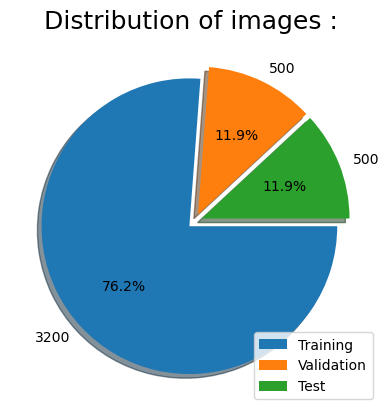

In [5]:

values = [3200,500,500]
labels = ['Training', 'Validation', 'Test']
explode = (0.05, 0.05, 0.05)
plt.pie(values, labels= values,explode=explode,counterclock=False, shadow=True, autopct='%1.1f%%')
font1 = {'color':'black','size':18}

plt.title('Distribution of images : ', fontdict = font1)
plt.legend(labels,loc="lower right"
)
plt.show()

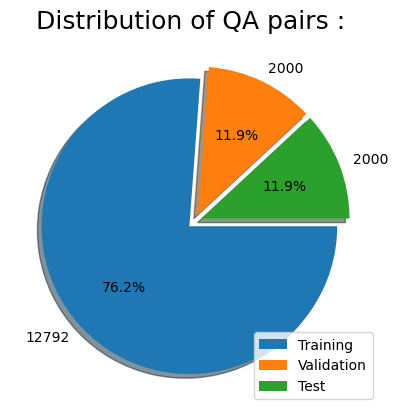

In [6]:
import matplotlib.pyplot as plt
 
values = [12792,2000,2000]
labels = ['Training', 'Validation', 'Test']
explode = (0.05, 0.05, 0.05)
plt.pie(values, labels= values,explode=explode,counterclock=False, shadow=True, autopct='%1.1f%%')
font1 = {'color':'black','size':18}

plt.title('Distribution of QA pairs : ', fontdict = font1)
plt.legend(labels,loc="lower right"
)
plt.show()

# mapping of the Qustions to their respective answer pairs

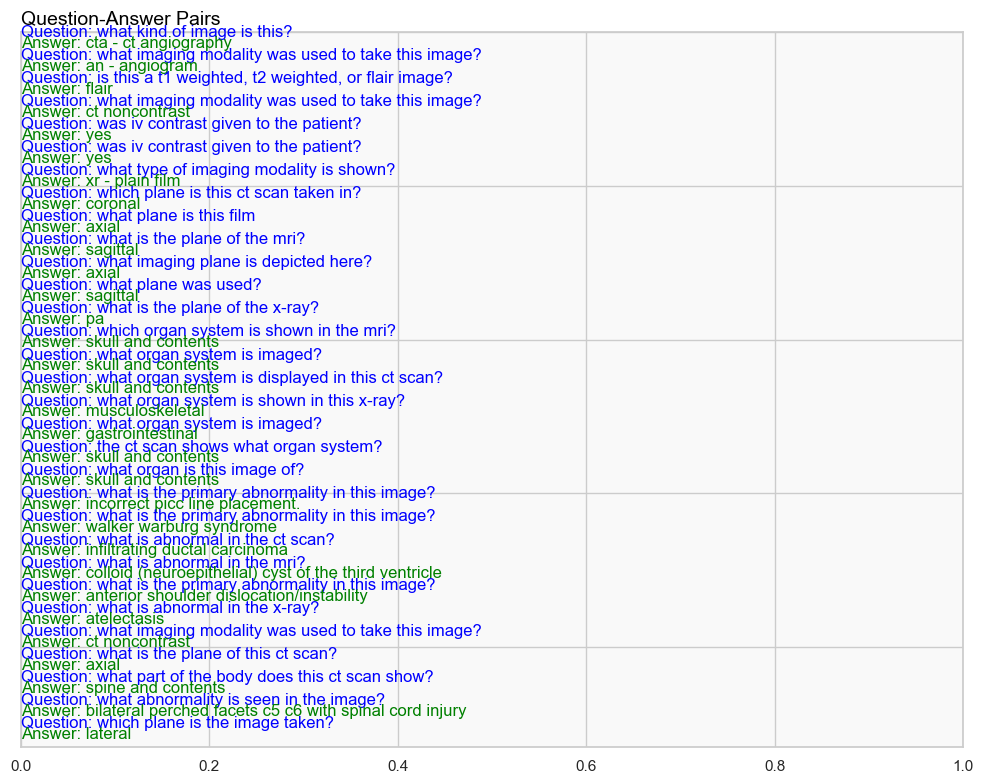

In [73]:
import matplotlib.pyplot as plt


questions = train['question'].iloc[::500]
answers = train['answer'].iloc[::500]


fig, ax = plt.subplots(figsize=(10, 8))  # Increased figure height


spacing =1.5  # Increased spacing


for i, (question, answer) in enumerate(zip(questions, answers)):
    ax.text(0., -i * spacing, f"Question: {question}", ha='left', va='center', fontsize=12, color='blue')
    ax.text(0., -i * spacing - 0.7, f"Answer: {answer}", ha='left', va='center', fontsize=12, color='green')
    

ax.set_ylim(-len(questions) * spacing, 0)
ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)


ax.set_facecolor('#f9f9f9')


plt.title('Question-Answer Pairs', fontsize=14, color='black', loc='left')

plt.tight_layout()
plt.show()


# Occurance Barplot for medical terms regarding Modality,Plane,Orgaan systems

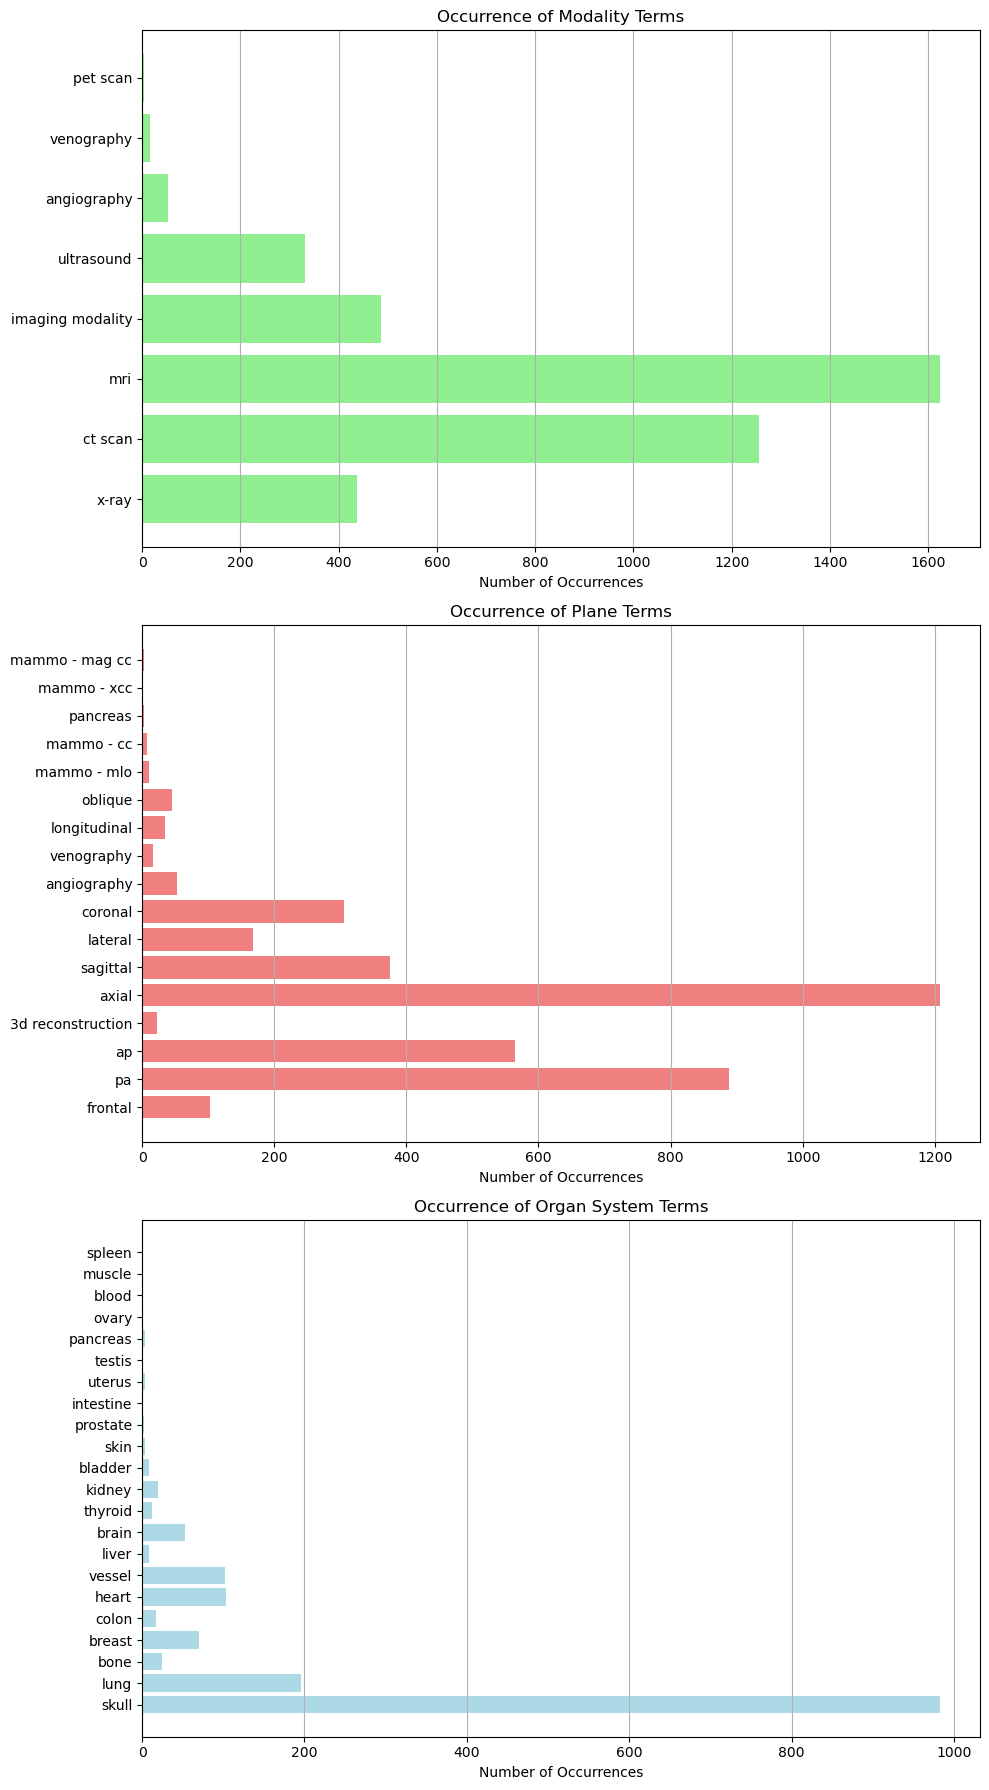

In [42]:
import re
import matplotlib.pyplot as plt
import random

sample_size = 10000  # Specify the number of samples you want
random_indices = random.sample(range(len(train)), sample_size)
random_question_answers = [(train.question.iloc[i], train.answer.iloc[i]) for i in random_indices]

# Regular expressions to match patterns of medical terms
medical_term_patterns = {
    'MODALITY': r'x-ray|ct scan|mri|pet scan|medical imaging|imaging modality|angiography|venography|ultrasound|mammography',
    'PLANE': r'Axial|Sagittal|Coronal|AP|Lateral|Frontal|PA|Oblique|Longitudinal|Decubitus|3D Reconstruction|Mammo - MLO|Mammo - CC|Mammo - Mag CC|Mammo - XCC',
    'ORGAN_SYSTEM': r'heart|brain|lung|liver|colon|kidney|skull|spleen|stomach|intestine|bladder|uterus|ovary|testis|breast|prostate|pancreas|thyroid|muscle|bone|blood|vessel|skin'
}

# Function to extract medical terms using regular expressions
def extract_medical_terms(text):
    medical_terms = []
    for category, pattern in medical_term_patterns.items():
        matches = re.findall(pattern, text, re.IGNORECASE)
        if matches:
            medical_terms.extend(matches)
    return medical_terms


modality_counts = {}
plane_counts = {}
organ_system_counts = {}


for question, answer in random_question_answers:
    question_terms = extract_medical_terms(question)
    answer_terms = extract_medical_terms(answer)
    all_terms = question_terms + answer_terms
    for term in all_terms:
        for category, pattern in medical_term_patterns.items():
            if re.search(pattern, term, re.IGNORECASE):
                if category == 'MODALITY':
                    modality_counts[term.lower()] = modality_counts.get(term.lower(), 0) + 1
                elif category == 'PLANE':
                    plane_counts[term] = plane_counts.get(term, 0) + 1
                elif category == 'ORGAN_SYSTEM':
                    organ_system_counts[term.lower()] = organ_system_counts.get(term.lower(), 0) + 1


fig, ax = plt.subplots(3, 1, figsize=(10, 18))


modality_labels = list(modality_counts.keys())
modality_values = list(modality_counts.values())
ax[0].barh(modality_labels, modality_values, color='lightgreen')
ax[0].set_xlabel('Number of Occurrences')
ax[0].set_title('Occurrence of Modality Terms')
ax[0].grid(axis='x')


plane_labels = list(plane_counts.keys())
plane_values = list(plane_counts.values())
ax[1].barh(plane_labels, plane_values, color='lightcoral')
ax[1].set_xlabel('Number of Occurrences')
ax[1].set_title('Occurrence of Plane Terms')
ax[1].grid(axis='x')


organ_system_labels = list(organ_system_counts.keys())
organ_system_values = list(organ_system_counts.values())
ax[2].barh(organ_system_labels, organ_system_values, color='lightblue')
ax[2].set_xlabel('Number of Occurrences')
ax[2].set_title('Occurrence of Organ System Terms')
ax[2].grid(axis='x')

plt.tight_layout()
plt.show()


# Analysis for the uniqueness in the dataset 

In [76]:
uq=train['question'].nunique()
ua=train['answer'].nunique()


In [77]:
print('Number of unique questions in the dataset :', uq)
print('Number of unique answers in the dataframe :', ua)

Number of unique questions in the dataset : 253
Number of unique answers in the dataframe : 1749


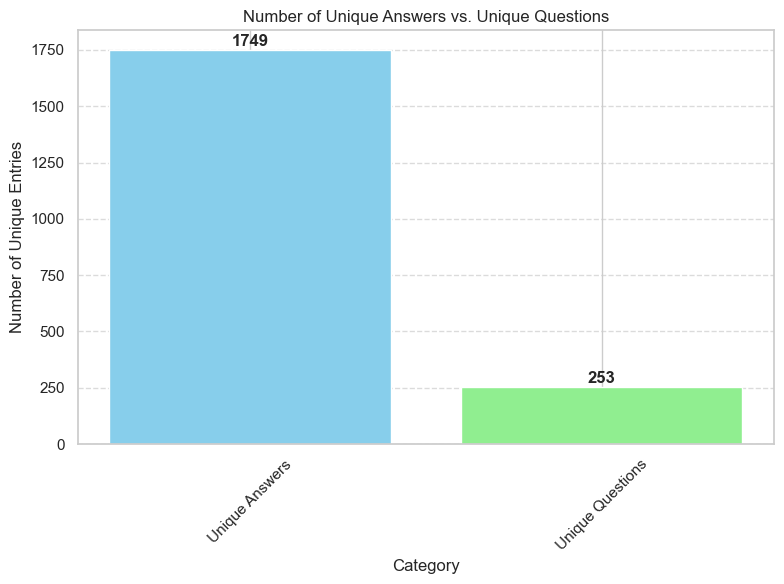

In [78]:
import matplotlib.pyplot as plt


unique_answers=ua
unique_questions=uq



plt.figure(figsize=(8, 6))
plt.bar(['Unique Answers', 'Unique Questions'], [unique_answers, unique_questions], color=['skyblue', 'lightgreen'])
plt.xlabel('Category')
plt.ylabel('Number of Unique Entries')
plt.title('Number of Unique Answers vs. Unique Questions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i, v in enumerate([unique_answers, unique_questions]):
    plt.text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')


plt.tight_layout()
plt.show()


# Converting the processed dataset into 3 CSV files as per the split train test and validation

In [25]:
answer_space = []
for ans in train.answer.to_list():
    answer_space = answer_space + [ans] #if "," not in ans else answer_space + ans.split(",") 
    
answer_space = list(set(answer_space))
answer_space.sort()
with open(os.path.join('answer_space.txt'), "w") as f:
    f.writelines("\n".join(answer_space)) 

In [26]:

t.to_csv('data_train.csv',index=None)
v.to_csv('data_val.csv',index=None)
e.to_csv('data_test.csv',index=None)

# creating the batch files of training testing and validation and acessing the medical image from respective dataset 
 

In [28]:

dataset = load_dataset(
    "csv", 
    data_files={
        "training": os.path.join('data_train.csv'),
        "validation": os.path.join('data_val.csv'),
        "test": os.path.join('data_test.csv')

    }
)


with open(os.path.join('answer_space.txt')) as f:
    answer_space = f.read().splitlines()



dataset = dataset.map(
    lambda examples: {
        'label': [
            answer_space.index(ans) for ans in examples['answer']           
        ]
    },
    batched=True
)
dataset

Map:   0%|          | 0/12792 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

DatasetDict({
    training: Dataset({
        features: ['img_id', 'question', 'answer', 'label'],
        num_rows: 12792
    })
    validation: Dataset({
        features: ['img_id', 'question', 'answer', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['img_id', 'question', 'answer', 'label'],
        num_rows: 500
    })
})

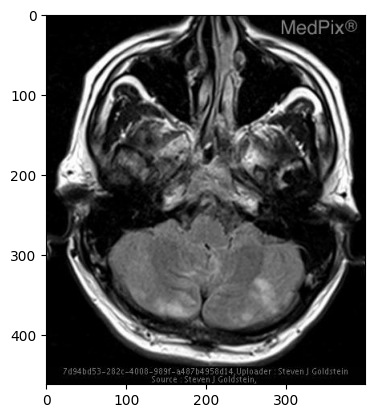

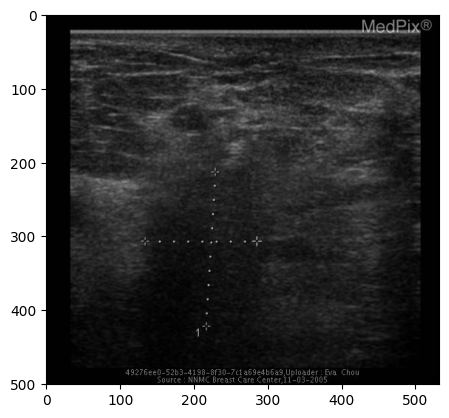

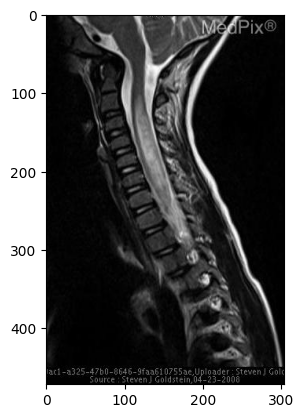

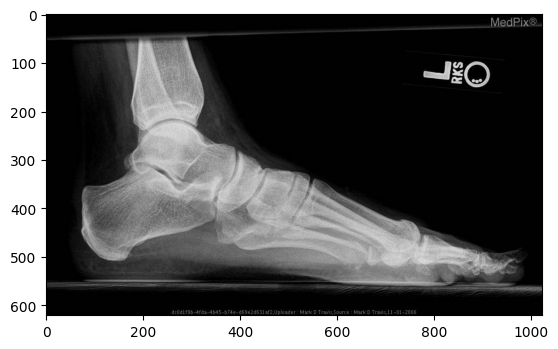

In [31]:
def process(training=True, id=None):
  if training:
    data = dataset["training"]
  else:
    data = dataset["validation"]
  if id == None:
    id = np.random.randint(len(data))
  root_dir = 'train\Train_images'
  image = Image.open(os.path.join( root_dir, data[id]["img_id"] + ".jpg"))
  plt.figure()
  plt.imshow(image)
for id in range(0,4):
  process()

# generating random open ended questions to feed as input into the model

In [32]:
import random
ques=train['question'].values
idx = random.sample(range(0, len(ques)), 20)
for i in (idx):
  print(ques[i])
  print('_'*50)

which organ is captured by this mri?
__________________________________________________
what organ system is evaluated primarily?
__________________________________________________
what imaging modality was used to take this image?
__________________________________________________
what organ system is visualized?
__________________________________________________
what is most alarming about this mri?
__________________________________________________
are there abnormalities in this mammograph?
__________________________________________________
what organ system is imaged?
__________________________________________________
what plane is demonstrated?
__________________________________________________
what organ system is shown in this mri?
__________________________________________________
is this a ct scan?
__________________________________________________
what abnormality is seen in the image?
__________________________________________________
what abnormality is seen in the image?


# The distribution of number of words per quesiton and answer and the comparison

<Figure size 1000x600 with 0 Axes>

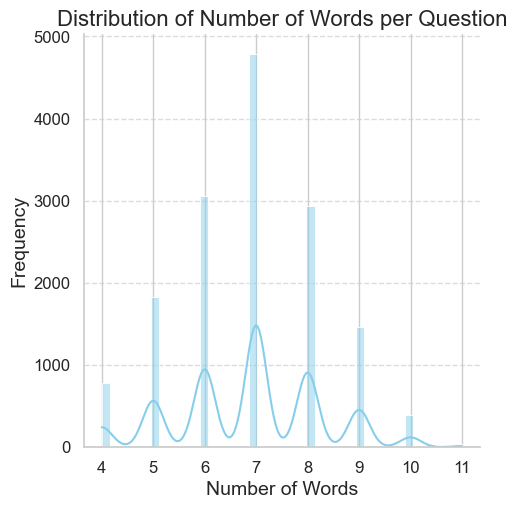

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.displot(train['number of words per question'], kde=True, color='skyblue')
plt.title('Distribution of Number of Words per Question', fontsize=16)
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/Users/biggyatpandey/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


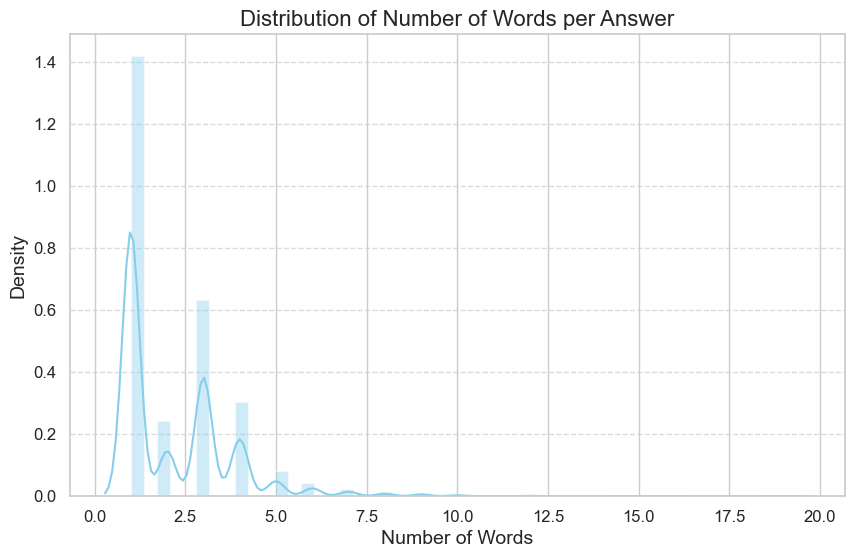

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.distplot(train['number of words per answer'], kde=True, color='skyblue')
plt.title('Distribution of Number of Words per Answer', fontsize=16)
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


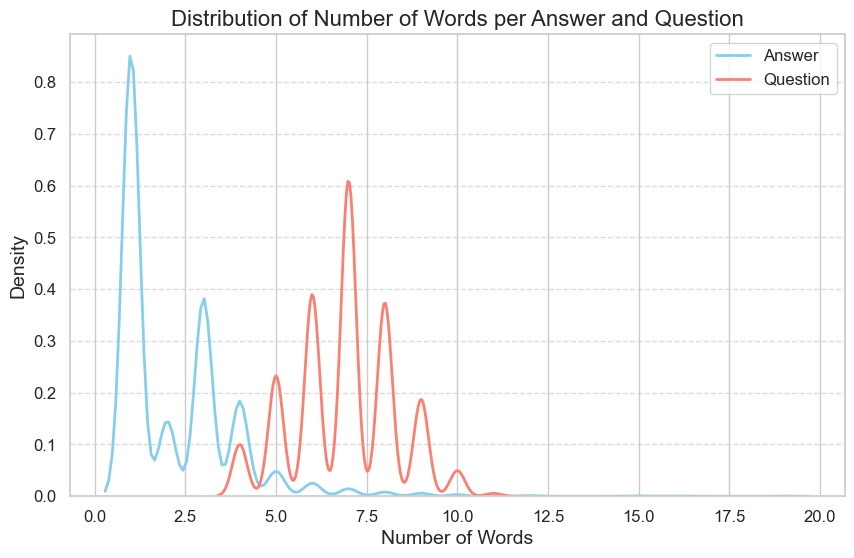

In [57]:



train.reset_index(drop=True, inplace=True)
sns.set(style="whitegrid")

# Plot the distribution of number of words per answer and question
plt.figure(figsize=(10, 6))


sns.kdeplot(train['number of words per answer'], color='skyblue', label='Answer', linewidth=2)


sns.kdeplot(train['number of words per question'], color='salmon', label='Question', linewidth=2)

plt.title('Distribution of Number of Words per Answer and Question', fontsize=16)
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Model sample

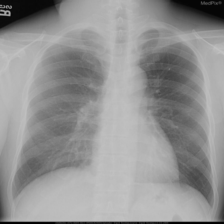

Question: 	how is the image taken?
Response: 	xr - plain film


In [35]:
def showExample(mode, id=None):
  if mode=="training":
    data = dataset["training"]
  elif mode=="validation":
    data = dataset["validation"]
  else:
    data = dataset["test"] 
  if id == None:
    id = np.random.randint(len(data))
  root_dir = 'train\Train_images'
  image = Image.open(os.path.join( root_dir, data[id]["img_id"] + ".jpg"))
  crop = fn.center_crop(image, output_size=[224])
  new_img = fn.resize(image, size=[224,224])
  display(new_img) 
  print('Question: \t' + data[id]['question'])
  print('Response: \t' + data[id]['answer'] )

showExample(mode="training")